In [1]:
import logging
from NuRadioReco.utilities.logging import set_general_log_level

import argparse
import time
import datetime
import numpy as np
import matplotlib.pyplot as plt

import NuRadioReco.detector.detector
# import NuRadioReco.modules.LOFAR.hardwareResponseIncorporator
import NuRadioReco.modules.channelGalacticNoiseAdder
import NuRadioReco.modules.channelGenericNoiseAdder
import NuRadioReco.modules.channelResampler
import NuRadioReco.modules.efieldToVoltageConverter
import NuRadioReco.modules.io.coreas
import NuRadioReco.modules.io.coreas.readCoREASDetector
from NuRadioReco.detector.SKA.detector import Detector
from NuRadioReco.modules import voltageToEfieldConverter
import NuRadioReco.modules.io.eventWriter
from NuRadioReco.framework.parameters import stationParameters, channelParameters, showerParameters
from NuRadioReco.utilities import units

 # Set log level of this script
set_general_log_level(logging.WARNING)  # Setup general logging level (before imports to get nice formatting everywhere)


lowfreq = 50 * units.MHz
highfreq = 350 * units.MHz

# input file
# filename = '/home/plaub/Documents/ska-pev-gamma/ska-pev/data/SIM000001.hdf5'
filename = '/home/plaub/Documents/ska-pev-gamma/ska-pev/data/ska_sims_hdf5/gamma/ska_test_urqmd_gamma_az90_el75_1e15_skasite_thin_1e-7/SIM000002.hdf5'
nur_filename = 'nur_files/test'
save_nur = True
sampling_rate = 1 * units.GHz

dezimation = 8
core_list = [np.array([0, 0, 0])]

long_trace = False
caching_efVT = True
caching_cGNA = True

# load detector:
det = Detector(
    'ska_layout/Vogel/telescope.tm',
    maximum_radius=50 * units.m
    )

selected_station_channel_ids = {}
for staid in det.get_station_ids():
    selected_station_channel_ids[staid] = np.sort(np.concatenate([det.get_channel_ids(staid)[0::2][::dezimation], 
                                                                  det.get_channel_ids(staid)[1::2][::dezimation]])) #select every [dezimation]th antenna, but keep channel pairs

# resample to 1 GHz
resampler = NuRadioReco.modules.channelResampler.channelResampler()
resampler.begin()

# Initialise GalacticNoiseAdder
# Choose sky model. Options: lfmap, lfss, gsm2016, gsm2008, haslam, ssm, gmoss, ulsa_fdi, ulsa_dpi, ulsa_ci.
# If you can and have it installed, use LFmap. otherwise, use gsm2008/2016
channelGalacticNoiseAdder = NuRadioReco.modules.channelGalacticNoiseAdder.channelGalacticNoiseAdder()
channelGalacticNoiseAdder.begin(
    skymodel='lfmap',
    caching=caching_cGNA
)

# Initialise GenericNoiseAdder
channelGenericNoiseAdder = NuRadioReco.modules.channelGenericNoiseAdder.channelGenericNoiseAdder()
channelGenericNoiseAdder.begin()

# initialise hardware response incorporator
# hardwareResponseIncorporator = NuRadioReco.modules.LOFAR.hardwareResponseIncorporator.hardwareResponseIncorporator()
# hardwareResponseIncorporator.begin(
#     debug=False
# )

# initialise efieldToVoltageConverter
efieldToVoltageConverter = NuRadioReco.modules.efieldToVoltageConverter.efieldToVoltageConverter()
efieldToVoltageConverter.begin(
    caching=caching_efVT
)

converter = voltageToEfieldConverter.voltageToEfieldConverter()
converter.begin()

# Initialise eventWriter to save event
eventWriter = NuRadioReco.modules.io.eventWriter.eventWriter()

# module to read the CoREAS file and convert it to NuRadioReco event for an array of detector stations.
readCoREASDetector = NuRadioReco.modules.io.coreas.readCoREASDetector.readCoREASDetector()
readCoREASDetector.begin(
    filename,
    interp_lowfreq=lowfreq, 
    interp_highfreq=highfreq
)

ERROR - 2025-03-12 12:14:11,083 - NuRadioReco.channelGalacticNoiseAdder - Could not find lfmap skymodel. Do you have the correct package installed? 
Defaulting to Global Sky Model (2008) as sky model.
WARNING - 2025-03-12 12:14:13,385 - NuRadioReco.coreas - No declination or site given, assuming 0 degrees. This might lead to unexpected electric field polarizations.


station 4
efield trace shape: (3, 4082)
efield trace_start_time: -224.87719743934628
efieldToVoltageConverter took 0:00:03.382531
channelResampler took 0:00:00.017087
channelGalacticNoiseAdder took 0:00:01.327242
channelGenericNoiseAdder took 0:00:00.008264


WARNING - 2025-03-12 12:14:35,539 - NuRadioReco.efieldToVoltageConverter - Frequencies have changed (array length). Clearing antenna response cache. (If this happens often, something might be wrong...
WARNING - 2025-03-12 12:14:35,681 - NuRadioReco.channelGalacticNoiseAdder - Frequencies have changed (array length). Clearing antenna response cache. (If this happens often, something might be wrong...


station processing took 0:00:04.988859
station 14
efield trace shape: (3, 4082)
efield trace_start_time: -169.97037267462602
efieldToVoltageConverter took 0:00:00.123159
channelResampler took 0:00:00.020678
channelGalacticNoiseAdder took 0:00:00.989763
channelGenericNoiseAdder took 0:00:00.015118


WARNING - 2025-03-12 12:14:36,902 - NuRadioReco.efieldToVoltageConverter - Frequencies have changed (array length). Clearing antenna response cache. (If this happens often, something might be wrong...


station processing took 0:00:01.364365
station 19
efield trace shape: (3, 4082)
efield trace_start_time: -239.0527157427278
efieldToVoltageConverter took 0:00:00.192705


WARNING - 2025-03-12 12:14:37,128 - NuRadioReco.channelGalacticNoiseAdder - Frequencies have changed (array length). Clearing antenna response cache. (If this happens often, something might be wrong...


channelResampler took 0:00:00.033945
channelGalacticNoiseAdder took 0:00:00.685027
channelGenericNoiseAdder took 0:00:00.007423


WARNING - 2025-03-12 12:14:38,037 - NuRadioReco.efieldToVoltageConverter - Frequencies have changed (array length). Clearing antenna response cache. (If this happens often, something might be wrong...
WARNING - 2025-03-12 12:14:38,169 - NuRadioReco.channelGalacticNoiseAdder - Frequencies have changed (array length). Clearing antenna response cache. (If this happens often, something might be wrong...


station processing took 0:00:01.133859
station 58
efield trace shape: (3, 4082)
efield trace_start_time: -186.59582600213926
efieldToVoltageConverter took 0:00:00.120124
channelResampler took 0:00:00.013399
channelGalacticNoiseAdder took 0:00:00.750002
channelGenericNoiseAdder took 0:00:00.009560
station processing took 0:00:01.103821
station 4
station 14
station 19
station 58


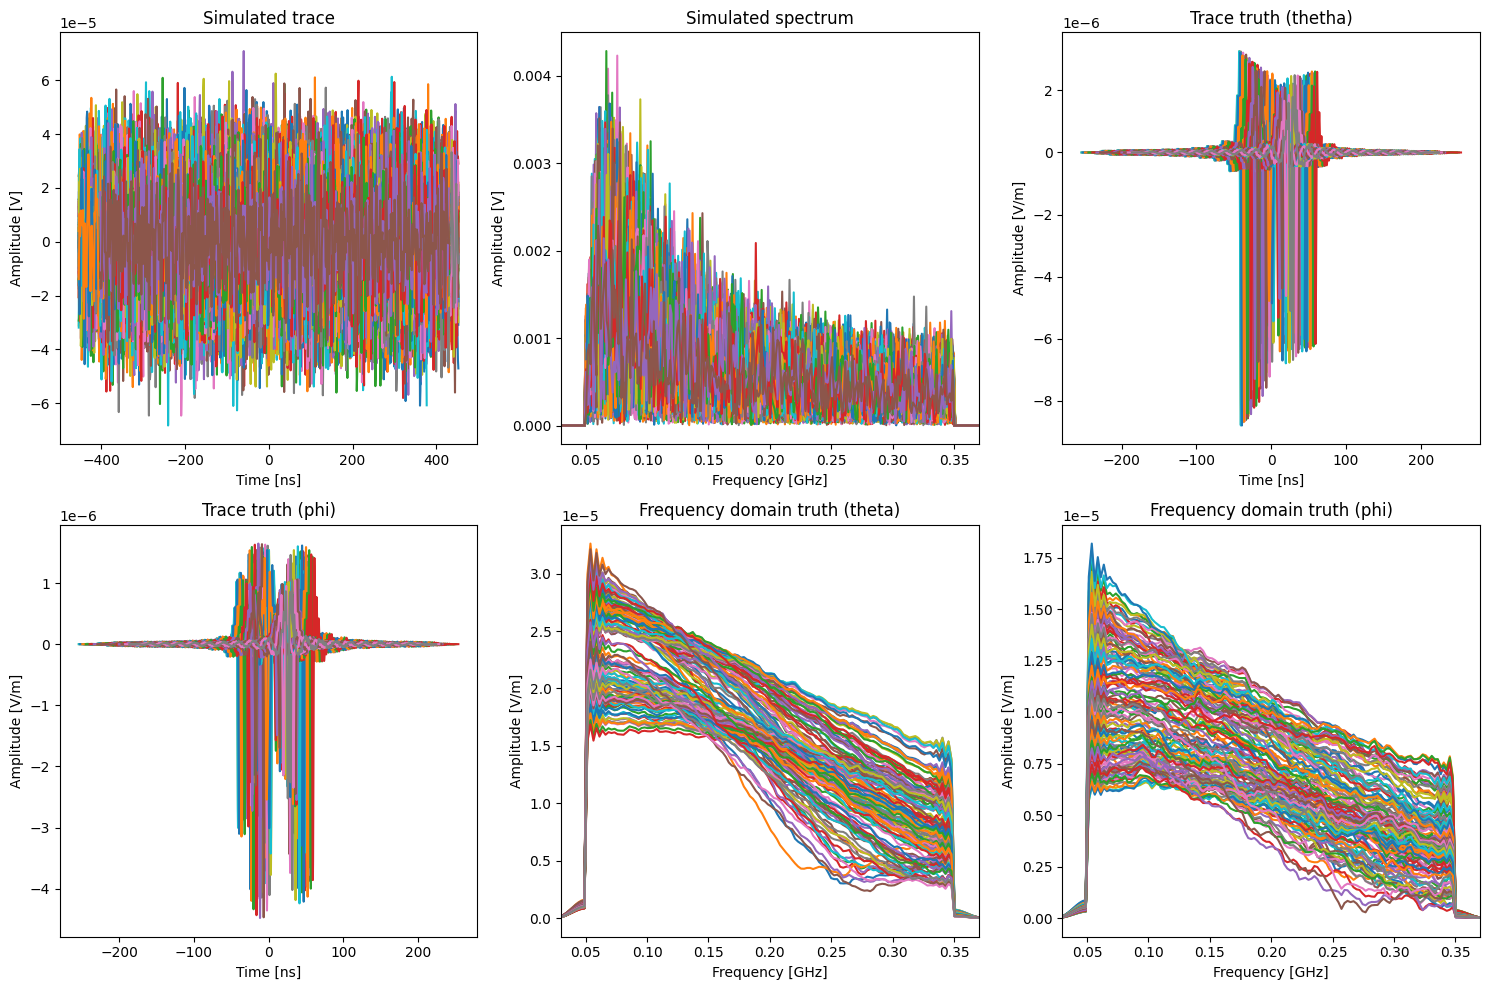

In [2]:
t0 = time.time()
station_time = datetime.datetime(2025, 2, 1, 0, 0, 0)
for eid, event in enumerate(readCoREASDetector.run(det, core_list, selected_station_channel_ids)):
    eventWriter.begin(f'{nur_filename}_{eid}_raw.nur')
    eventWriter.run(event)
    eventWriter.end()
    

    #event.set_parameter(showerParameters.core, np.array([0.0, 0.0, 0.0]))

    for station in event.get_stations():
        ts0 = time.time()
        station.set_station_time(station_time)
        sim_station = station.get_sim_station()
        zenith = sim_station[stationParameters.zenith] 
        azimuth = sim_station[stationParameters.azimuth]

        station.set_parameter(stationParameters.zenith, zenith)
        station.set_parameter(stationParameters.azimuth, azimuth)
        station.set_parameter(stationParameters.triggered, True)
        station.set_is_cosmic_ray()
        
        print(f"station {station.get_id()}")

        field = sim_station.get_electric_fields()[0]
        print(f"efield trace shape: {field.get_trace().shape}")
        print(f"efield trace_start_time: {field.get_trace_start_time()}")
        t0 = time.time()
        efieldToVoltageConverter.run(
            event,
            station,
            det,
            channel_ids=selected_station_channel_ids[station.get_id()]
        )
        traces = [channel.get_trace() for channel in station.iter_channels()]
        t1 = time.time()
        print(f"efieldToVoltageConverter took {datetime.timedelta(seconds=t1 - t0)}")
        resampler.run(
            event,
            station,
            det,
            sampling_rate
        )
        t2 = time.time()
        print(f"channelResampler took {datetime.timedelta(seconds=t2 - t1)}")
        if long_trace:
            efields = [field for field in sim_station.get_electric_fields()]

            for e in efields:
                for i in e.get_channel_ids():
                    channel = station.get_channel(i)

                    trace = channel.get_trace()
                    times = channel.get_times()
                    
                    longer_trace = np.zeros(10000)

                    # fill longer trace with trace exactly in the middle, using half the length of trace to get exactly the indices to fill
                    longer_trace[5000 - len(trace) // 2:5000 + len(trace) // 2] = trace
                    channel.set_trace(trace=longer_trace, sampling_rate=sampling_rate)
            t_tmp = time.time()
            print(f"preparing long trace took {datetime.timedelta(seconds=t_tmp - t2)}")

        excluded_channels = [chid for chid in station.get_channel_ids() if chid not in selected_station_channel_ids[station.get_id()]]
        t31 = time.time()
        channelGalacticNoiseAdder.run(
            event,
            station,
            det,
            passband=[lowfreq, highfreq],
            excluded_channels=excluded_channels
        )
        t32 = time.time()
        print(f"channelGalacticNoiseAdder took {datetime.timedelta(seconds=t32 - t31)}")

        channelGenericNoiseAdder.run(
            event, 
            station, 
            det,
            # amplitude=9.921 * units.microvolt,  # coorresponds to 300 K, 50 Ohm, 25-500 MHz
            amplitude=6.777 * units.microvolt,  # coorresponds to 140 K, 50 Ohm, 25-500 MHz
            min_freq=lowfreq, 
            max_freq=highfreq, 
            type='rayleigh',
            excluded_channels=excluded_channels
        )
        t4 = time.time()
        print(f"channelGenericNoiseAdder took {datetime.timedelta(seconds=t4 - t32)}")
        

        # run hardwareResponseIncorporator once it is implemented for SKA:
        # hardwareResponseIncorporator.run(
        #     station,
        #     det,
        #     sim_to_data=True
        # )


        for group_id in station.get_channel_ids(return_group_ids=True):
            converter.run(
                event, station, det,
                use_channels=[channel.get_id() for channel in station.iter_channel_group(group_id)]
            )
        ts1 = time.time()
        print(f"station processing took {datetime.timedelta(seconds=ts1-ts0)}")
    converter.end()

    # Save the data
    eventWriter.begin(f'{nur_filename}_{eid}_processed.nur')
    eventWriter.run(event)
    eventWriter.end()

    # plot the traces and spectra. Replace this with your own analysis! This is just an example that takes some time to run,
    # and is only meant to show how to access the traces and spectra.
    #logger.info("Plotting traces and spectra...")

    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    axs = axs.flatten()

    for station in event.get_stations():
        sim_station = station.get_sim_station()
        print(f"station {station.get_id()}")
        efields = [field for field in sim_station.get_electric_fields() if
                np.max(np.abs(field.get_trace())) >= 1.0e-10]

        for e in efields:
            for i in e.get_channel_ids():
                channel = station.get_channel(i)

                trace = channel.get_trace()
                times = channel.get_times()
                axs[0].plot(times, trace)

                freqs = channel.get_frequencies()
                spec = channel.get_frequency_spectrum()
                axs[1].plot(freqs, np.abs(spec))

            etimes = e.get_times()
            etr = e.get_trace()

            efreq = e.get_frequencies()
            epw = e.get_frequency_spectrum()

            axs[2].plot(etimes, etr[1])
            axs[3].plot(etimes, etr[2])

            axs[4].plot(efreq, np.abs(epw)[1])
            axs[5].plot(efreq, np.abs(epw)[2])

    axs[1].set_xlim(lowfreq - 20 * units.MHz, highfreq + 20 * units.MHz)
    axs[4].set_xlim(lowfreq - 20 * units.MHz, highfreq + 20 * units.MHz)
    axs[5].set_xlim(lowfreq - 20 * units.MHz, highfreq + 20 * units.MHz)

    # add titles and labels to subplots
    axs[0].set_title('Simulated trace')
    axs[0].set_xlabel('Time [ns]')
    axs[0].set_ylabel('Amplitude [V]')
    axs[1].set_title('Simulated spectrum')
    axs[1].set_xlabel('Frequency [GHz]')
    axs[1].set_ylabel('Amplitude [V]')
    axs[2].set_title('Trace truth (thetha)')
    axs[2].set_xlabel('Time [ns]')
    axs[2].set_ylabel('Amplitude [V/m]')
    axs[3].set_title('Trace truth (phi)')
    axs[3].set_xlabel('Time [ns]')
    axs[3].set_ylabel('Amplitude [V/m]')
    axs[4].set_title('Frequency domain truth (theta)')
    axs[4].set_xlabel('Frequency [GHz]')
    axs[4].set_ylabel('Amplitude [V/m]')
    axs[5].set_title('Frequency domain truth (phi)')
    axs[5].set_xlabel('Frequency [GHz]')
    axs[5].set_ylabel('Amplitude [V/m]')
    plt.tight_layout()
    # plt.savefig("testplots.png")
    plt.show()

### compare caching and no caching

In [7]:
traces = np.array(traces)
traces_caching = np.copy(traces)

In [11]:
traces = np.array(traces)
traces_nocaching = np.copy(traces)

In [12]:
np.sum(np.abs(traces_caching - traces_nocaching))

np.float64(0.0)

In [13]:
traces.shape

(64, 8352)

In [16]:
lengths = []
for station in event.get_stations():
    sim_station = station.get_sim_station()
    efields = [field for field in sim_station.get_electric_fields()]    
    for efield in efields:
        lengths.append(efield.get_trace().shape[1])

In [7]:
print(f"{890:06}")

000890


In [23]:
station.get_channel_ids()

[np.int64(0),
 np.int64(1),
 np.int64(10),
 np.int64(11),
 np.int64(20),
 np.int64(21),
 np.int64(30),
 np.int64(31),
 np.int64(40),
 np.int64(41),
 np.int64(50),
 np.int64(51),
 np.int64(60),
 np.int64(61),
 np.int64(70),
 np.int64(71),
 np.int64(80),
 np.int64(81),
 np.int64(90),
 np.int64(91),
 np.int64(100),
 np.int64(101),
 np.int64(110),
 np.int64(111),
 np.int64(120),
 np.int64(121),
 np.int64(130),
 np.int64(131),
 np.int64(140),
 np.int64(141),
 np.int64(150),
 np.int64(151),
 np.int64(160),
 np.int64(161),
 np.int64(170),
 np.int64(171),
 np.int64(180),
 np.int64(181),
 np.int64(190),
 np.int64(191),
 np.int64(200),
 np.int64(201),
 np.int64(210),
 np.int64(211),
 np.int64(220),
 np.int64(221),
 np.int64(230),
 np.int64(231),
 np.int64(240),
 np.int64(241),
 np.int64(250),
 np.int64(251),
 np.int64(260),
 np.int64(261),
 np.int64(270),
 np.int64(271),
 np.int64(280),
 np.int64(281),
 np.int64(290),
 np.int64(291),
 np.int64(300),
 np.int64(301),
 np.int64(310),
 np.int64(311)

In [4]:
selected_station_channel_ids[58]

array([   0,    1,   80,   81,  160,  161,  240,  241,  320,  321,  400,
        401,  480,  481,  560,  561,  640,  641,  720,  721,  800,  801,
        880,  881,  960,  961, 1040, 1041, 1120, 1121, 1200, 1201, 1280,
       1281, 1360, 1361, 1440, 1441, 1520, 1521, 1600, 1601, 1680, 1681,
       1760, 1761, 1840, 1841, 1920, 1921, 2000, 2001, 2080, 2081, 2160,
       2161, 2240, 2241, 2320, 2321, 2400, 2401, 2480, 2481])

In [5]:
event.get_station(58).get_channel_ids()

[np.int64(0),
 np.int64(1),
 np.int64(80),
 np.int64(81),
 np.int64(160),
 np.int64(161),
 np.int64(240),
 np.int64(241),
 np.int64(320),
 np.int64(321),
 np.int64(400),
 np.int64(401),
 np.int64(480),
 np.int64(481),
 np.int64(560),
 np.int64(561),
 np.int64(640),
 np.int64(641),
 np.int64(720),
 np.int64(721),
 np.int64(800),
 np.int64(801),
 np.int64(880),
 np.int64(881),
 np.int64(960),
 np.int64(961),
 np.int64(1040),
 np.int64(1041),
 np.int64(1120),
 np.int64(1121),
 np.int64(1200),
 np.int64(1201),
 np.int64(1280),
 np.int64(1281),
 np.int64(1360),
 np.int64(1361),
 np.int64(1440),
 np.int64(1441),
 np.int64(1520),
 np.int64(1521),
 np.int64(1600),
 np.int64(1601),
 np.int64(1680),
 np.int64(1681),
 np.int64(1760),
 np.int64(1761),
 np.int64(1840),
 np.int64(1841),
 np.int64(1920),
 np.int64(1921),
 np.int64(2000),
 np.int64(2001),
 np.int64(2080),
 np.int64(2081),
 np.int64(2160),
 np.int64(2161),
 np.int64(2240),
 np.int64(2241),
 np.int64(2320),
 np.int64(2321),
 np.int64(24

In [3]:
station = event.get_station(4)

In [3]:
a = True
b = True
a and not b

False

In [5]:
fluences = []
positions = []
for staid in selected_station_channel_ids.keys():
    station = event.get_station(staid)
    try:
        for chid in selected_station_channel_ids[staid]:
            trace = station.get_channel(chid).get_trace()
            fluences.append(np.sum(np.square(trace)))
            positions.append(det.get_absolute_position(staid) + det.get_relative_position(staid, chid))
    except:
        continue

In [6]:
positions = np.array(positions)

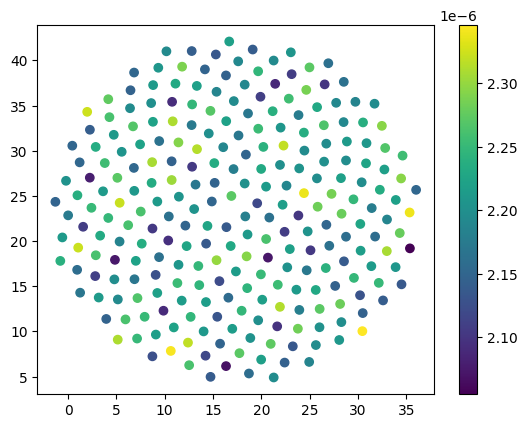

In [7]:
plt.figure()
plt.scatter(positions[:,0][::2], positions[:,1][::2], c=fluences[::2])
plt.colorbar()
plt.show()

In [22]:
len(selected_station_channel_ids.keys())

11

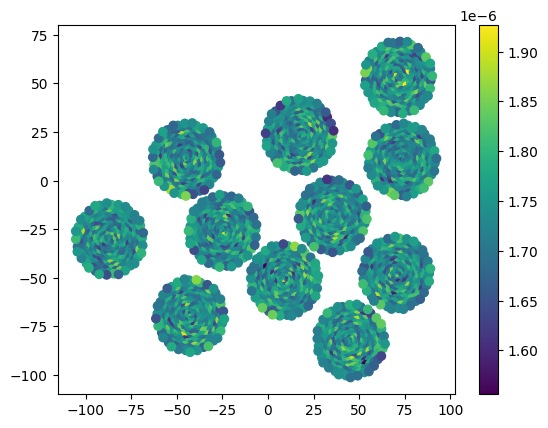

In [21]:
plt.figure()
plt.scatter(positions[:,0][1::2], positions[:,1][1::2], c=fluences[1::2])
plt.colorbar()
plt.show()